# Notebook to check the dataset

## Import different dataset to have a global picture

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('../raw_data/train.csv')

In [4]:
df

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013


In [4]:
# ! pip install scikit-image

In [5]:
from skimage import io
import os

In [88]:
filename = os.path.abspath(os.path.join('../raw_data/train_images', '00039780dfc94d01db8676fe789ecd05.jpg'))
filename

'/Users/zongyizhu/code/migasar/kaggle-wagon552-shopee/raw_data/train_images/00039780dfc94d01db8676fe789ecd05.jpg'

In [89]:
import matplotlib.pyplot as plt

In [90]:
img = io.imread(filename)
img.shape

(1000, 1000, 3)

In [91]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

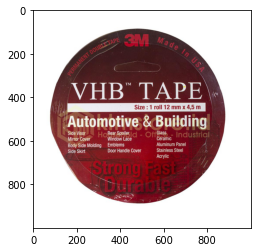

In [92]:
plt.imshow(img)

In [12]:
# from PIL import Image
# image = Image.open(filename)
# image= image.resize((256,256))

In [11]:
from skimage import color
from skimage.transform import rescale
image = color.rgb2gray(img)
image_rescaled = rescale(image, 256/1024, anti_aliasing=False)

In [12]:
image_rescaled

array([[0.41998431, 0.37586667, 0.37978824, ..., 0.41096363, 0.39324873,
        0.39005216],
       [0.28763137, 0.27684706, 0.27782745, ..., 0.44064373, 0.42012706,
        0.39858382],
       [0.36900392, 0.39155294, 0.38665098, ..., 0.37184314, 0.40497824,
        0.43350745],
       ...,
       [0.57015637, 0.40865627, 0.45329912, ..., 0.51743078, 0.57855206,
        0.54556539],
       [0.44846784, 0.46441804, 0.47503186, ..., 0.4979549 , 0.59175235,
        0.52546451],
       [0.41179373, 0.4931549 , 0.48532882, ..., 0.48660118, 0.58150529,
        0.52350373]])

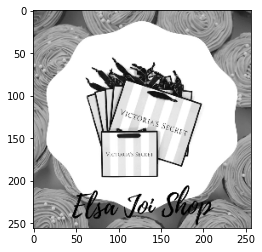

In [13]:
plt.imshow(image_rescaled, cmap=plt.cm.gray)

In [14]:
image_rescaled.shape[0]

256

In [43]:
def rescale_img(file_name):
    filename = os.path.abspath(os.path.join('../raw_data/train_images', file_name))
    image = io.imread(filename)
    image_bw = color.rgb2gray(image)
    img_shape = image_bw.shape
    if img_shape[0] == img_shape[1] and img_shape[0] > 100:
        img_rescale = rescale(image_bw, 100/img_shape[0], anti_aliasing=False)
        return np.reshape(img_rescale, (100 * 100))
    else:
        return None

In [44]:
img_1 = rescale_img('000a190fdd715a2a36faed16e2c65df7.jpg')

In [45]:
# np.reshape(img_rescale, (img_shape * img_shape))
img_1.shape

(10000,)

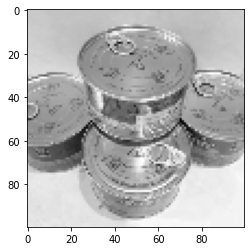

In [29]:
plt.imshow(img_1, cmap=plt.cm.gray)

In [46]:
df["img_data"] = df['image'].apply(rescale_img)

In [111]:
df.head(25)

,posting_id,image,image_phash,title,label_group,img_data
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,"[0.2863545098039194, 0.3814760784313546, 0.434..."
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,"[0.7907054901960784, 0.7907054901960784, 0.784..."
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,"[0.996078431372549, 0.996078431372549, 0.99607..."
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
5,train_2464356923,0013e7355ffc5ff8fb1ccad3e42d92fe.jpg,bbd097a7870f4a50,CELANA WANITA (BB 45-84 KG)Harem wanita (bisa...,2660605217,"[0.6917803921568628, 0.6917803921568628, 0.692..."
6,train_1802986387,00144a49c56599d45354a1c28104c039.jpg,f815c9bb833ab4c8,Jubah anak size 1-12 thn,1835033137,"[0.838129411764706, 0.8385215686274518, 0.8498..."
7,train_1806152124,0014f61389cbaa687a58e38a97b6383d.jpg,eea7e1c0c04da33d,KULOT PLISKET SALUR /CANDY PLISKET /WISH KULOT...,1565741687,"[0.9533839215686273, 0.9639582352941168, 0.957..."
8,train_86570404,0019a3c6755a194cb2e2c12bfc63972e.jpg,ea9af4f483249972,"[LOGU] Tempelan kulkas magnet angka, tempelan ...",2359912463,"[0.9994345098039216, 0.9994345098039213, 0.995..."
9,train_831680791,001be52b2beec40ddc1d2d7fc7a68f08.jpg,e1ce953d1a70618f,BIG SALE SEPATU PANTOFEL KULIT KEREN KERJA KAN...,2630990665,"[0.07181725490196078, 0.07181725490196078, 0.0..."


In [112]:
df_clean = df.mask(df.eq('None')).dropna()

/Users/zongyizhu/.pyenv/versions/3.8.6/envs/game_one/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:56: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


In [122]:
df_clean['img_data'].shape

(34131,)

In [ ]:
df.to_csv('../raw_data/train_v2.csv', index = False, mode = 'w', header=True)

In [69]:
def img_reshape(img_np):
    shape = img_np.shape
    return np.reshape(img_np, (shape[0] * shape[1], 1))

In [114]:
img_np = list(df_clean['img_data'])

In [124]:
img_array = np.vstack(img_np)

In [125]:
img_array.shape

(34131, 10000)

In [127]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150)

In [128]:
data_projected = pca.fit_transform(img_array)

In [129]:
data_projected.shape

(34131, 150)

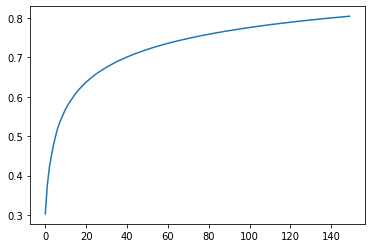

In [130]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

## classification of images

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (img_array, df_clean['label_group'], test_size = 0.3, random_state = 0)

In [133]:
X_train.shape

(23891, 10000)

In [134]:
pca1 = PCA(n_components=150)

In [135]:
pca1.fit(X_train)

PCA(n_components=150)

In [136]:
X_train_tr = pca1.transform(X_train)

In [137]:
X_test_tr = pca1.transform(X_test)

 ### Cross validate your choice of best hyperparameters

In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# from scipy import stats
model = SVC(class_weight='balanced')

grid = {'kernel':['linear','poly','rbf','sigmoid'],
        'C': [10, 100, 1000],
        'gamma': [0.0001, 0.001, 0.01]}

grid_search = GridSearchCV(model,
                           grid, 
                           cv = 5,
                           scoring='f1_weighted',
                           n_jobs=-1)

In [142]:
grid_search.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': 'balanced',
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(class_weight='balanced'),
 'iid': 'deprecated',
 'n_jobs': -1,
 'param_grid': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
  'C': [10, 100, 1000],
  'gamma': [0.0001, 0.001, 0.01]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'f1_weighted',
 'verbose': 0}

In [144]:
# grid_search.fit(X_train_tr, y_train)

In [ ]:
# grid_search.best_estimator_

In [ ]:
best_model = SVC(C=10, class_weight='balanced', gamma=0.0001, kernel='linear')
best_model.fit(X_train_tr, y_train)
y_pred = best_model.predict(X_test_tr)

In [ ]:
from sklearn.metrics import classification_report